# Analysing the host information including;age, location,gender and status for the possible prediction of outcome of recovery vs Death

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sklearn

In [2]:
data = pd.read_csv('data_results.csv')

In [3]:
# iterating the columns 
for col in data.columns: 
    print(col) 

virus_name
accession_id
type
lineage
passage_details_history
collection_date
location
host
additional_location_information
gender
age
status
specimen_source
additional_host_information
outbreak
last_vaccinated
treatment
sequencing_technology
assembly_method
coverage
comment
originating_lab
address
sample_id_given_by_the_sample_provider
submitting_lab
sample_id_given_by_the_submitting_laboratory
authors
submitter
submission_date
query
strand
%n
length(nt)
length(aa)
#muts
%muts
#uniquemuts
%uniquemuts
#existingmuts
%existingmuts
symbol
reference
uniquemutlist
existingmutlist
clade
ifexistspecialchar


# Preprocessing and cleaning the data

In [4]:
#important features
start_data_row = 0
Final_data_row = 1129
Data = data.loc[start_data_row:Final_data_row, ['status','%n','length(nt)','length(aa)',
                                                   '%muts','%uniquemuts','%existingmuts','existingmutlist','clade']]
#change the index of the data according to the length of the new data
Data.index = range(len(Data))

In [5]:
#removing the % from the data
Data['%n'] = Data['%n'].str.replace('%', ' ') 
Data['%muts'] = Data['%muts'].str.replace('%', ' ') 
Data['%uniquemuts'] = Data['%uniquemuts'].str.replace('%', ' ') 
Data['%existingmuts'] = Data['%existingmuts'].str.replace('%', ' ') 
Data['%n'].astype(float)
Data['%muts'].astype(float)
Data['%uniquemuts'].astype(float)
Data['%existingmuts'].astype(float)

0       0.05
1       0.04
2       0.06
3       0.03
4       0.02
        ... 
1123    0.05
1124    0.05
1125    0.05
1126    0.07
1127    0.06
Name: %existingmuts, Length: 1128, dtype: float64

In [6]:
#getting rid of NaN data
Data.dropna(subset = ['status'], inplace=True)
Data.dropna(subset = ['existingmutlist'], inplace=True)
Data.drop(Data.loc[Data['status']=='unknown'].index, inplace=True)

Data.drop(Data.loc[Data['status']=='n/a'].index, inplace=True)

Data.drop(Data.loc[Data['status']=='NA'].index, inplace=True)

Data.drop(Data.loc[Data['status']=='-'].index, inplace=True)

Data.drop(Data.loc[Data['status']=='Unknown'].index, inplace=True)

Data.index = range(len(Data))

In [7]:
#chacking if there is any null data in ExistingMutList
for i in range(len(Data)):
    if pd.isnull(Data.existingmutlist[i]) is True:
        print('True')

In [8]:
#getting rid of NaN data
Data.drop(Data.loc[Data['status']=='unknown'].index, inplace=True)

In [9]:
#Labeling
Data.replace(['Deceased'],value= [1], inplace=True)
Data.status[Data['status'] != 1]=0

C:\Users\Azadeh\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [10]:
#using dummies instead of location data for ML input
Data_model = pd.concat([pd.get_dummies(Data[['existingmutlist']]),pd.get_dummies(Data[['clade']]), Data[['status','%n','length(nt)','length(aa)',
                                                   '%muts','%uniquemuts']]], axis=1)
Data_model.head()

,existingmutlist_(E_T30I),"existingmutlist_(NS3_G196V,NS8_G8R,NS8_L84S)",existingmutlist_(NS3_G251V),"existingmutlist_(NS7b_T40I,NS8_L84S)",existingmutlist_(NS8_L84S),"existingmutlist_(NS8_L84S,N_G238C)","existingmutlist_(NS8_L84S,N_S202N)","existingmutlist_(NSP10_T111I,NSP12_P323L,Spike_D614G,N_N140T,N_G97S)",existingmutlist_(NSP10_T51A),"existingmutlist_(NSP12_A449T,NSP12_P323L,Spike_D614G,NS3_Q57H,NS7a_V24F)",...,clade_G,clade_Other,clade_S,clade_V,status,%n,length(nt),length(aa),%muts,%uniquemuts
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0.00,29890,9710,0.04,0.00
1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0.00,29859,9710,0.04,0.00
2,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0.00,29917,9710,0.05,0.01
3,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0.00,29892,9710,0.08,0.01
4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0.00,29828,9710,0.02,0.00


In [11]:
#checking the balance in the data
Data_model['status'].value_counts()

0    894
1     39
Name: status, dtype: int64

In [12]:
#Separating target (label) data
X = Data_model.drop('status',axis=1).astype(float)
y = Data_model.status
y=y.astype(int)
y.value_counts()
X

,existingmutlist_(E_T30I),"existingmutlist_(NS3_G196V,NS8_G8R,NS8_L84S)",existingmutlist_(NS3_G251V),"existingmutlist_(NS7b_T40I,NS8_L84S)",existingmutlist_(NS8_L84S),"existingmutlist_(NS8_L84S,N_G238C)","existingmutlist_(NS8_L84S,N_S202N)","existingmutlist_(NSP10_T111I,NSP12_P323L,Spike_D614G,N_N140T,N_G97S)",existingmutlist_(NSP10_T51A),"existingmutlist_(NSP12_A449T,NSP12_P323L,Spike_D614G,NS3_Q57H,NS7a_V24F)",...,"existingmutlist_(Spike_T307I,NS3_G251V)",clade_G,clade_Other,clade_S,clade_V,%n,length(nt),length(aa),%muts,%uniquemuts
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.00,29890.0,9710.0,0.04,0.00
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.00,29859.0,9710.0,0.04,0.00
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.00,29917.0,9710.0,0.05,0.01
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.00,29892.0,9710.0,0.08,0.01
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.00,29828.0,9710.0,0.02,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
928,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.44,29903.0,9710.0,0.05,0.00
929,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.45,29903.0,9710.0,0.05,0.00
930,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.44,29903.0,9710.0,0.05,0.00
931,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.45,29903.0,9710.0,0.07,0.00


In [13]:
#splitting features and the label: 20% test data and 80% assigned to training data
# split into train/test sets with same class ratio
from sklearn.model_selection import KFold, cross_val_score, train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5, stratify=y)


### Balancing the data

In [14]:
from imblearn.over_sampling import SMOTE
# transform the dataset
oversample = SMOTE()
X_train, y_train = oversample.fit_resample(X_train, y_train)

C:\Users\Azadeh\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\Azadeh\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.ensemble.bagging module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\Azadeh\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.ensemble.base module is  deprecated in version 0.22 and will be removed

In [15]:
# Scaling the data

#Scaling the data to standarize them
#Here caling reduced the iteration number from 200 to 50
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

# Random Forest model

In [16]:
#fitting the model and get the conversion probabilities. 
#predit_proba() function of our model assigns probability for each row:
from sklearn.ensemble import RandomForestClassifier

# Create the model with 100 trees
model = RandomForestClassifier(n_estimators=30,max_depth = 60, max_features = 'log2')
# Fit on training data
model.fit(X_train,y_train)
y_hat = model.predict(X_test)
RF_probs = model.predict_proba(X_test)[:,1]
#Return the mean accuracy on the given test data and taraining data to see if we have overfitting.score clculates R^2
print('R^2 _train=',model.score(X_train, y_train))
print('R^2 _test=',model.score(X_test, y_test))





R^2 _train= 0.9944055944055944
R^2 _test= 0.8983957219251337


In [17]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_hat})
df.head(25)

,Actual,Predicted
65,0,0
137,0,0
66,0,0
839,0,0
730,0,0
32,0,0
728,0,0
862,0,0
895,0,0
250,0,0


In [18]:
### Cross validation 

#Cross validation
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X_train, y_train, cv=10)
print('Cross-Validation Accuracy Scores', scores)
scores = pd.Series(scores)
print('CV-scores_min = ',scores.min())
print('CV_scores_mean =', scores.mean())
print('CV_scores_max =', scores.max())


Cross-Validation Accuracy Scores [0.93706294 0.98601399 0.97902098 0.97902098 0.97202797 0.94405594
 0.98601399 0.97902098 0.97902098 0.95104895]
CV-scores_min =  0.9370629370629371
CV_scores_mean = 0.9692307692307693
CV_scores_max = 0.986013986013986


Mean Absolute Error: 0.10160427807486631
Mean Squared Error: 0.10160427807486631
Root Mean Squared Error: 0.3187542596968177
roc_auc = 0.8009776536312849
No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.801


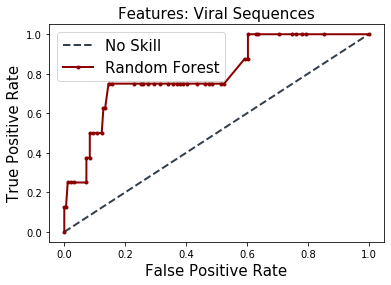

In [19]:
### Performance measurement metrics

import sklearn.metrics as metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_hat))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_hat))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_hat)))

#Area Under ROC Curve (AUROC) metric
from sklearn.metrics import roc_auc_score
# Keep only the positive class
#lr_probs = [p[1] for p in lr_probs]
print( 'roc_auc =', roc_auc_score(y_test, RF_probs) )

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
RF_probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
RF_probs = RF_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
RF_auc = roc_auc_score(y_test, RF_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (RF_auc))


# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
RF_fpr, RF_tpr, _ = roc_curve(y_test, RF_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill',  linewidth=2,  color = '#333F4B')
pyplot.plot(RF_fpr, RF_tpr, marker='.', label='Random Forest', linewidth=2, color = 'darkred')
# axis labels
pyplot.xlabel('False Positive Rate',fontsize=15)
pyplot.ylabel('True Positive Rate',fontsize=15)
pyplot.title('Features: Viral Sequences',fontsize=15)
# show the legend
pyplot.legend(fontsize=15)
# show the plot
pyplot.show()

In [20]:
from sklearn.metrics import recall_score
recall_score(y_test, y_hat, average='weighted')


0.8983957219251337